### Эквализация изображения
Одной из процедур адаптивной гистограммной обработки изображения является *эквализация* изображения. Эквализация также отображает реальный яркостный диапазон данного изображения (от минимального до максимального значения интенсивности) на диапазон [0, 255]. При этом обеспечивается "выравнивание" числа пикселов изображения, имеющих различные значения яркости. Математическая форма данного преобразования имеет вид
$$
{\rm LUT}[i] = 255 \cdot  \frac{\sum\limits_{j=1}^i \textrm{Hist}[j]} {\sum\limits_{j=1}^{255} \textrm{Hist}[j]},
$$
В тех случаях, когда в диапазоне [Imin,Imax] более или менее равномерно присутствуют все градации, визуальный эффект от эквализации трудно отличить от эффекта нормализации. Однако в случае, когда значительная часть градаций яркости отсутствует, эквализация позволяет более равномерно использовать диапазон [0,255] для более контрастного отображения присутствующих на изображении градаций. Визуально это выглядит как "проявление" большего количества ранее не заметных на изображении деталей и контуров.

Импорт необходимых библиотек

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt

Загрузка изображения

In [10]:
image5 = cv.imread('images/lenna_bad.png')

Опеределение ширины и высоты изображения

In [11]:
height, width = image5.shape[:2]

Переводим изображения в сервый цвет модели BGR (используем только один канал)

In [12]:
gray_image1 = cv.cvtColor(image5, cv.COLOR_BGR2GRAY)
gray_image2 = cv.cvtColor(image5, cv.COLOR_BGR2GRAY)

Инициализация переменных для рассчета

In [13]:
range1 = [0, 256]
channels = [0]
histSize = [256]
hist1 = cv.calcHist([gray_image1], channels, None, histSize, range1)
dict = {}
histSum2 = 0
for k in range(1, 256):
    histSum2 = histSum2 + hist1[k]

Реализация формулы и запись значений в словарик

In [14]:
for i in range(0, 256):
    histSum1 = 0

    for j in range(1, i):
        histSum1 = histSum1 + hist1[j]

    dict[i] = 255 * histSum1 / histSum2

Применение рассчета к изображению

In [15]:
for i in range(0, width):
    for j in range(0, height):
        gray_image2[i, j] = dict[gray_image1[i, j]]

Вывод изображения и гистограммы до/после эквилизации

(array([1232., 1860.,    0., 1448., 1817.,    0., 2353.,    0., 2898.,
           0.,    0., 3090.,    0.,    0., 3160.,    0.,    0., 3260.,
           0.,    0., 3340.,    0.,    0., 3286.,    0.,    0., 2790.,
           0.,    0., 2628.,    0.,    0., 2347.,    0., 2033.,    0.,
        1917.,    0., 1620., 1534.,    0., 1398., 1285.,    0., 1266.,
        1247., 1383., 1270.,    0., 1361., 1409., 1426.,    0., 1529.,
        1418.,    0., 1437., 1440., 1589.,    0., 1674.,    0., 1734.,
        1801.,    0., 1832.,    0., 2166.,    0., 2363.,    0., 2659.,
           0.,    0., 3020.,    0.,    0., 2933.,    0.,    0., 3142.,
           0.,    0., 2997.,    0., 2842.,    0.,    0., 2645.,    0.,
           0., 2292.,    0., 2236.,    0., 2198.,    0., 2167.,    0.,
        2289.,    0.,    0., 2132.,    0., 2286.,    0., 2529.,    0.,
        2501.,    0.,    0., 3037.,    0.,    0., 3061.,    0.,    0.,
        3373.,    0.,    0., 3673.,    0.,    0.,    0., 3775.,    0.,
      

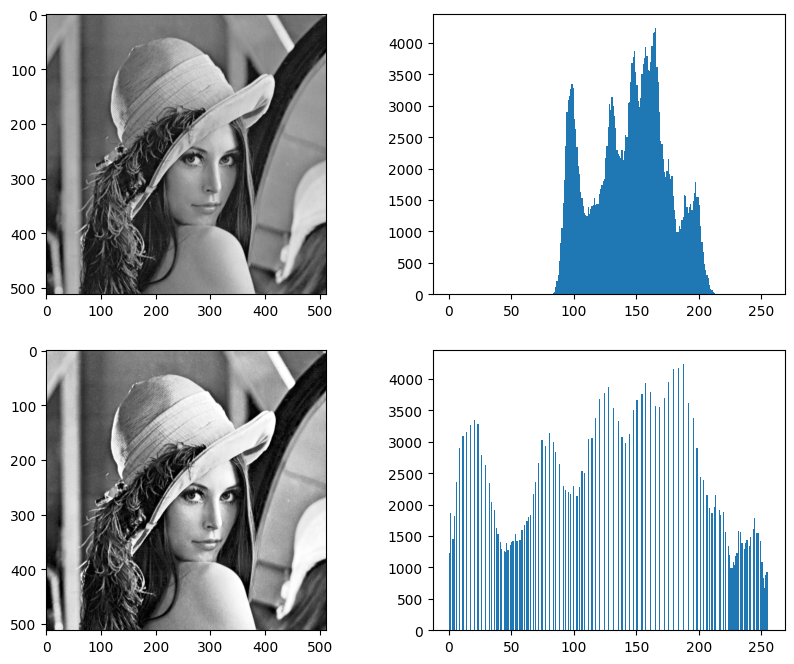

In [16]:
gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.hist(gray_image1.reshape(-1), 256, range1)
plt.subplot(gs[2])
plt.imshow(gray_image2, cmap='gray')
plt.subplot(gs[3])
plt.hist(gray_image2.reshape(-1), 256, range1)